## Multiple minima vs Initial guess

## $g(x) = x^4 - 4x^2 + 5$

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Making data
x_2 = np.linspace(-2, 2, 1000)

In [3]:
def g(x):
    return x ** 4 - 4 * x **2 + 5

In [6]:
def deriv_g(x):
    return 4 * x ** 3 - 8 * x

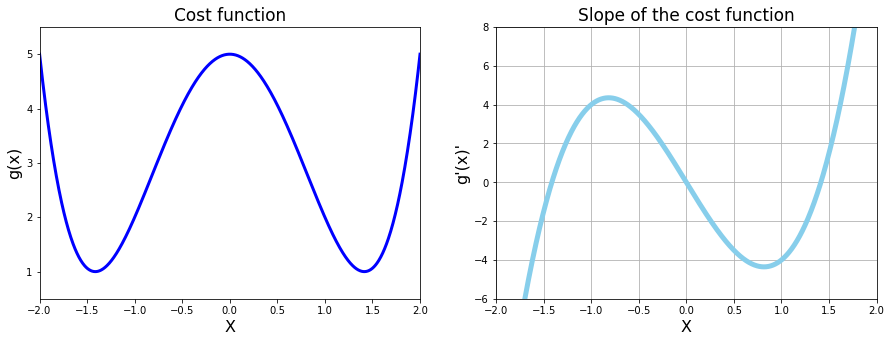

In [16]:
# Plotting
plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title("Cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("g(x)", fontsize=16)
plt.plot(x_2, g(x_2), color="blue", linewidth=3)

plt.subplot(1, 2, 2)
plt.title("Slope of the cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("g' (x)'", fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, deriv_g(x_2), color="skyblue", linewidth=5)

## BATCH Gradient Descent as a function

In [28]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001):
    new_x = initial_guess    
    x_values = [new_x]
    slope_values = [derivative_func(new_x)]

    for n in range(500):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)

        x_values.append(new_x)
        slope_values.append(derivative_func(new_x))

        if step_size < precision:
            break
    
    return new_x, x_values, slope_values

In [33]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=deriv_g, initial_guess=0.5)
print(f"Local minimum occurs at: {local_min}")
print(f"Number of steps: {len(list_x)}")


Local minimum occurs at: 1.4122375085019094
Number of steps: 23


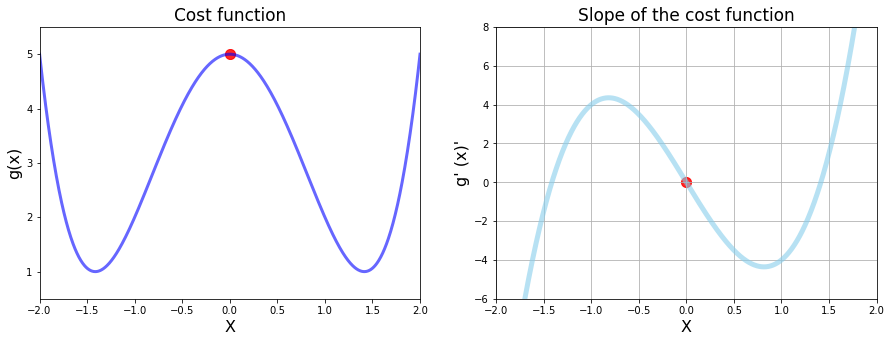

In [38]:
# Plotting function and derivative and scatter plot
local_min, list_x, deriv_list = gradient_descent(derivative_func=deriv_g, initial_guess=0)
plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title("Cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("g(x)", fontsize=16)
plt.plot(x_2, g(x_2), color="blue", linewidth=3, alpha=0.6)


plt.scatter(list_x, g(np.array(list_x)), color="red", s=100, alpha=0.6)

plt.subplot(1, 2, 2)
plt.title("Slope of the cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("g' (x)'", fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, deriv_g(x_2), color="skyblue", linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color="red", s=100, alpha=0.6)            
plt.show()